# Term Frequency-Inverse Document Frequency (tf-idf) Analysis
This notebook calculates the tf-idf value for all stems in the corpus, both overall and by year, and plots a few significant stems by year.

In [1]:
import pickle
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def generalize_fun(corpus, lambda_fun):
    # must handle a list of lists (tokenized docs) and also a simple list
    
    if isinstance(corpus[0], list):
        # list of lists
        corpus = map(lambda_fun, corpus)
    else:
        # single list
        corpus = lambda_fun(corpus)
        
    return list(corpus)


def stem(corpus):
    # perform stemming
    stemmer = SnowballStemmer('english')
    stemmer_fun = lambda x: list(map(stemmer.stem, x))

    corpus = generalize_fun(corpus, stemmer_fun)
    new_corpus = []
    for corp in corpus:
        new_corpus.append(' '.join(corp))
    
    return new_corpus


def tf_idf_by_year(corpus,output='dataframe'):
    
    stemmed_text = stem(corpus)
    
    tf = TfidfVectorizer(stop_words='english')

    X = tf.fit_transform(stemmed_text).toarray()
    
    df = pd.DataFrame(X, columns=tf.get_feature_names())
                      
    if output == 'list':
        return df.mean(axis=0).sort_values(ascending=False).head(40)
    elif output == 'dataframe':
        return df
    else:
        return None


def tf_idf_all(corpus,output='list'):
    
    all_text = []
    
    for _,v in corpus.items():
        stemmed_text = stem(v)
        all_text += stemmed_text
    
    tf = TfidfVectorizer(stop_words='english')

    X = tf.fit_transform(all_text).toarray()
    
    df = pd.DataFrame(X, columns=tf.get_feature_names())
    
    if output == 'list':
        return df.mean(axis=0).sort_values(ascending=False).head(40)
    elif output == 'dataframe':
        return df
    else:
        return None

### Instantiate stemmer

In [3]:
stemmer = SnowballStemmer("english")

### Load in corpus

In [4]:
corpus_ads = pickle.load(open('../data/pickle_jar/corpus_ads_1.p','rb'))

### Build corpus dictionary by year

In [5]:
ad_text = {k: [[x[0] for x in v[i]] for i in range(len(v))] for k,v in corpus_ads.items()} 

In [6]:
# sample output of dictionary
ad_text['1993'][0][:10]

['federal',
 'several',
 'still',
 'large',
 'spectacular',
 'islamic',
 'radical',
 'assassinate',
 'political',
 'federal']

### Find most important stems from entire corpus

In [7]:
all_tfidf_list = tf_idf_all(ad_text,output='list')

In [8]:
# top ten stems
all_tfidf_list[:10]

militari       0.026794
mani           0.024509
feder          0.021858
isra           0.021607
polit          0.019888
palestinian    0.019220
nation         0.018840
public         0.018153
white          0.016465
islam          0.016430
dtype: float64

### Create dataframe of tf-idf values for entire corpus

In [9]:
all_tfidf_df = tf_idf_all(ad_text,output='dataframe')

### Create dataframes of tf-idf values by year

In [10]:
df_dict = {k: tf_idf_by_year(v) for k,v in ad_text.items()}

In [11]:
# sample of yearly tf-idf dataframe
df_dict['1993'].head()

,aba,abandon,abas,abbott,abc,abd,abdel,abdelgani,abdesalam,abdomin,...,yugoslavia,zaillian,zair,zaleski,zealous,zen,zepc,zombi,zoolog,zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Build dictionary of tf-idf values by year for top-40 stems from entire corpus

In [12]:
yearly_t40_values = {}

for k,v in df_dict.items():
    yearly_t40_values[k] = {word: v.loc[:,word].mean() if word in v.columns else 0 for word in list(all_tfidf_list.index)}

In [32]:
# sample output
yearly_t40_values['1993']

{'british': 0.010236556896899245,
 'bush': 0.0053144474115025021,
 'clear': 0.014648694248343691,
 'far': 0.015313629409100362,
 'feder': 0.023828018554881186,
 'foreign': 0.01572822883726447,
 'general': 0.016110517495368838,
 'good': 0.013846224286809946,
 'high': 0.01376666540182105,
 'human': 0.017299969311415583,
 'intern': 0.020829722137397665,
 'iraq': 0.0048067004665819256,
 'islam': 0.015551344961875348,
 'isra': 0.021468236188349622,
 'israel': 0.011351403431853492,
 'ist': 0.006522504872544431,
 'laden': 0.0015226338494544803,
 'larg': 0.012282396738918625,
 'later': 0.013291884744552351,
 'legal': 0.0080186078005851542,
 'littl': 0.014228645253961064,
 'long': 0.019566898507307456,
 'mani': 0.029400731096933828,
 'militari': 0.032768858035658467,
 'nation': 0.018179684566301865,
 'old': 0.023072852154549617,
 'palestinian': 0.015394064289526105,
 'polit': 0.029042834969763547,
 'possibl': 0.011030778963860214,
 'public': 0.01794193013478516,
 'qaeda': 0,
 'real': 0.01221310

### Convert top-40 dictionary to dataframe

In [19]:
t40_df = pd.DataFrame.from_dict(yearly_t40_values,orient='index')

In [20]:
t40_df.reset_index(inplace=True)
t40_df.rename(columns={'index':'year'},inplace=True)

In [21]:
t40_df.head()

,year,militari,mani,feder,isra,polit,palestinian,nation,public,white,...,later,qaeda,possibl,young,british,real,west,larg,legal,senior
0,1993,0.032769,0.029401,0.023828,0.021468,0.029043,0.015394,0.018180,0.017942,0.013640,...,0.013292,0.0,0.011031,0.014818,0.010237,0.012213,0.012683,0.012282,0.008019,0.012312
1,1994,0.035033,0.031347,0.013789,0.030060,0.029132,0.021189,0.017089,0.017577,0.016214,...,0.013693,0.0,0.009674,0.015918,0.013037,0.010788,0.014880,0.013752,0.007037,0.008506
2,1995,0.022689,0.029232,0.039677,0.028441,0.022367,0.023235,0.015206,0.015214,0.017493,...,0.014365,0.0,0.012033,0.013431,0.004842,0.009886,0.016759,0.011644,0.008777,0.008575
3,1996,0.020537,0.031020,0.025944,0.041605,0.021650,0.029639,0.016775,0.015694,0.016145,...,0.014813,0.0,0.011018,0.013660,0.007559,0.013023,0.015639,0.011514,0.008218,0.008103
4,1997,0.020388,0.031124,0.013812,0.056275,0.026087,0.048769,0.014570,0.018413,0.016026,...,0.015779,0.0,0.010242,0.017634,0.010878,0.011077,0.016086,0.012556,0.008632,0.010434


### Plot select stems tf-idf values by year

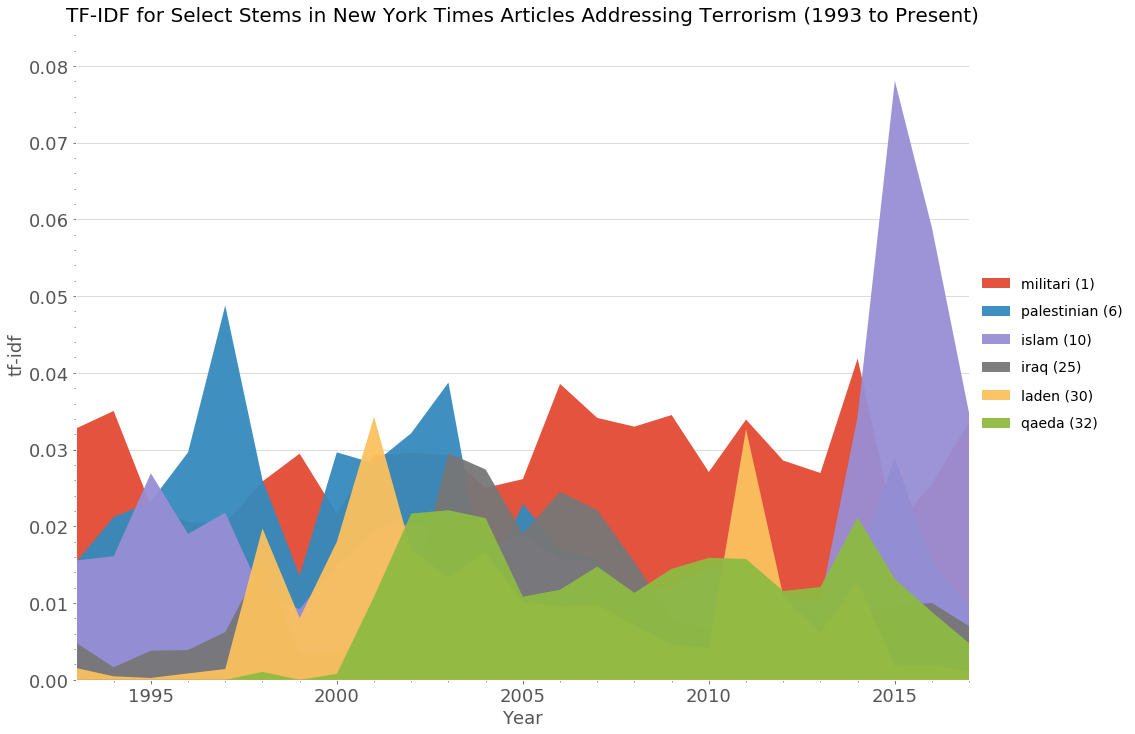

In [28]:
fig,ax = plt.subplots(figsize=(16,12))

mask = ['militari','palestinian','islam','iraq','laden','qaeda']

for col in t40_df[mask]:
    
    ax.fill_between(t40_df.year.apply(lambda x: int(x)),0,np.array(t40_df[col]),
                    label='{} ({})'.format(col,list(all_tfidf_list.index).index(col) + 1),
                    alpha=0.95)
    

ax.set(facecolor='white',
      title='TF-IDF for Select Stems in New York Times Articles Addressing Terrorism (1993 to Present)',
      xlabel='Year',
      ylabel='tf-idf',
      xlim=(1993,2017),
      ylim=(0,0.085));

ax.legend(loc='center left', 
            bbox_to_anchor=(1, 0.5),
            fontsize=14,
          facecolor='white',
          edgecolor='white',
          labelspacing=1
         );

ax.minorticks_on();
ax.grid(which='major',axis='y',color='grey',alpha=0.35);

for item in ([ax.xaxis.label, 
              ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18);
    
for item in ([ax.title]):
    item.set_fontsize(20);